# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
display(data.head())
display(data.shape)
display(data.info())

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


(4870, 65)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

None

In [4]:
sum(data[data.race=='w'].call)
sum(data[data.race=='b'].call)

157.0

**You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.**  
*1. What test is appropriate for this problem? Does CLT apply?*

This problem falls under the "two-sample inference for the difference between groups" heading, because we have 2 samples ('black-sounding' resumes and 'white-sounding' resumes) and are trying to infer the difference in proportion for callback success for them. Hence, the specific test we are applying is a test for difference in population proportion. This test can be applied in 2 ways: by using bootstrapping/hacker statistics and by using a frequentist/analytical method. Both methods are applied below.

The Central Limit Theorem (CLT) does apply because we are dealing with 2 binomial distributions where the Bernoulli trial composing the distribution can be thought of as "Callback/success or No Callback/Failure". The CLT says that when we add independent random variables, the distribution of that sum assumes a normal distribution. In the case of a binomial distribution, we are adding Bernoulli random variables, and the binomial variable that results is normally distrbuted as the number of trials increases. This is also known as the "De Moivre-Laplace theorem" (https://en.wikipedia.org/wiki/De_Moivre%E2%80%93Laplace_theorem). This fact allows us to use features associated with the normal distribution like z and t statistics.

*2. What are the null and alternate hypotheses?*

1. Null Hypothesis: Both 'black-sounding' and 'white-sounding' resumes experience the same rate of callbacks.
2. Alternative Hypothesis: 'Black-sounding' resumes receive callbacks at a rate less than that of 'white-sounding' resumes.
3. Test statistic: difference in proportion of callbacks for resumes.

*3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.*

In [5]:
w = data[data.race=='w']
b = data[data.race=='b']

#### Bootstrap Test

In [6]:
w2 = w.call
b2 = b.call
call_concat = np.concatenate((w2, b2))
# Compute the mean callback rate of all resumes: mean_callback
mean_callback = np.mean(call_concat)

In [7]:
# Margin of Error and Confidence Interval for Difference of Proportions

In [8]:
p_white = np.sum(w2)/len(w2)
p_black = np.sum(b2)/len(b2)
p_combined = (np.sum(w2) + np.sum(b2)) / (len(w2) + len(b2))
diff_p = p_white - p_black

In [9]:
def proportion_diff(data1, data2):
    return (np.sum(data1)/len(data1) - np.sum(data2)/len(data2))

def proportion(data):
    return np.sum(data)/len(data)

def bootstrap_replicate_1d(data1, data2, func):
    bs1 = np.random.choice(data1, len(data)) 
    bs2 = np.random.choice(data2, len(data)) 
    return func(bs1, bs2)

def draw_bs_reps(data1, data2, func, size=1):
    np.random.seed(42)
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data1, data2, func)
        
    return bs_replicates

In [10]:
bs_reps = draw_bs_reps(w2, b2, proportion_diff, size=10000)

In [11]:
proportion_diff(w2, b2)

0.032032854209445585

In [12]:
confidence_interval = np.percentile(bs_reps, [2.5, 97.5])
confidence_interval

array([0.02135524, 0.04271047])

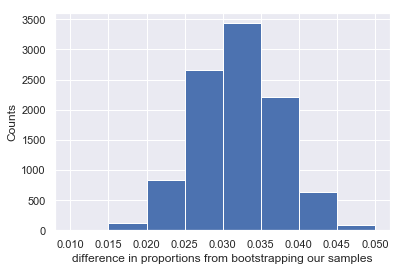

In [13]:
sns.set()
plt.hist(bs_reps, bins=[0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05])
plt.xlabel('difference in proportions from bootstrapping our samples')
plt.ylabel('Counts')
plt.show()

In [14]:
moes = bs_reps.mean() - confidence_interval
moes

array([ 0.01068322, -0.01067201])

In [15]:
# calculating p value
total = len(b2) + len(w2)
nums = np.zeros(len(w2))
nums[:int(np.sum(b2)*(len(b2)/total) + np.sum(w2)*(len(w2)/total))] = 1 # Null hypothesis
bs_reps_2 = draw_bs_reps(nums, nums, proportion_diff, size=10000)
p_val = np.sum(bs_reps_2 >= diff_p) / len(bs_reps_2)
p_val

0.0

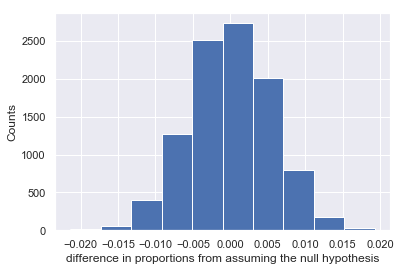

In [16]:
plt.hist(bs_reps_2)
plt.xlabel('difference in proportions from assuming the null hypothesis')
plt.ylabel('Counts')
plt.show()

Therefore, the p value for receiving the difference in proportion of callback rates under the null Hypothesis that the proportion rate is equal for both 'black-sounding' and 'white-sounding' resumes and by using bootstrapping is equal to 0 with 10,000 samples. That is, none of our replicates had a difference in propotion as great as what was observed. Our 95% confidence interval with bootstrapping is [0.02135524, 0.04271047].

#### Frequentist

In [17]:
## Caclulate margin of error and confidence interval 
# Confidence interval is equal to diff +/- moe where moe = test_stat*(standard_deviation_proportion_difference)
std_diff = np.sqrt(((p_white*(1-p_white))/len(w2)) + ((p_black*(1-p_black))/len(w2)))
critical_z_value = stats.norm.ppf(0.975)  #95% confidence interval 

In [18]:
moe = critical_z_value * std_diff
moe

0.01525512602821483

In [19]:
confidence_interval_diff = diff_p + np.array([-1, 1])*moe
confidence_interval_diff 

array([0.01677773, 0.04728798])

In [20]:
# Calculate p value
assumed_diff_p = 0 # Null Hypothesis is that p_diff = 0

In [21]:
assumed_diff_std = np.sqrt((2*p_combined*(1-p_combined))/len(w2)) 
"calculate standard deviation of the distribution of the difference in proportions assuming \
the proportion is the same for both populations. Use the most likely value for p, the average of the proportions"
assumed_diff_std 

0.007796894036170457

In [22]:
# Set alpha at 5%
alpha = 0.05
critical_value = stats.norm.ppf(1-alpha)
critical_value

1.6448536269514722

In [23]:
z_score = (diff_p - assumed_diff_p)/assumed_diff_std
z_score

4.108412152434346

In [24]:
p_value = stats.norm.sf(abs(z_score))
p_value

1.9919434187925383e-05

Our p value is roughly 2e-05 or 0.00002. This means that under the null hypothesis that the proportion of callbacks for 'black-sounding' and 'white-sounding' resumes is equal, there is a 0.002% chance that we would get the results we did. This certainly exceeds our threshold for significance.

   *4. Write a story describing the statistical significance in the context or the original problem.*


The story here is that race does have a very high level of significance on the rate of callbacks for resumes. We tested the null hyptothesis that the rate of callbacks for resumes was the same for both 'black-sounding' and 'white-sounding' resumes using a callback rate that was the mean of the overall sample (that is, the sum of the proportions for each group multiplied by their overall representation in the group). We found a p value of 0 for the null Hypothesis using bootstrapping and a p value of essentially 0 using a frequentist model. Similarly, we found a 95% confidence interval of the difference in callback rate that was between 0.02135524 and 0.04312115 using bootstrapping, and between 0.01677773 and 0.04728798 using a frequentist model, which also indicates that the difference is real and significant. 

*5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?*

It does not mean that race/name is the most important factor in callback success. It could be, but that could only be determined after examining each of the other factors. It is also important to define what is meant by "most important factor". A logical definition would mean a factor that is both neccessary and sifficient for callback success. That is, a factor which when absent means that their will be callback failure and when present means there will be callback success. 

One way of measuring callback success is to go through each factor and see what the expected rate of success increase is when we alter the value of the factor. For example, how much does the success rate increase or decrease in response to education, work experience, military service, etc. Thus, we would need to amend our analysis by including an analysis of these other factors to see how much they contribute to callback success.